![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel, Dr. Dominik Kern  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Paths of seismic body waves and the terrestrial brachistochrone

Fermat principle states, that light and generally waves, travel on path of shortest time.
For the velocity of P- and S-waves in elastic media holds $c_\mathrm{P}, c_\mathrm{S} \propto \sqrt{\mu}$, where $\mu$ denotes shear modulus.

In [1]:
#HIDDEN
from IPython.display import display, Math, Latex
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import plot_functions.plot_settings

## Preliminary considerations in Cartesian Coordinates (classical brachistochrone)

Following the textbook [Mark Levi: Classical Mechanics with Calculus of Variations and Optimal Control](https://www.google.de/books/edition/_/uVSYswEACAAJ?hl=de&sa=X&ved=2ahUKEwiE_I3G-ofyAhUBD-wKHdOeClUQ8fIDMBF6BAgIEAM) chapter 5.5

It is customary to approximate the depth-dependent shear modulus by $\mu \propto p \propto z$, thus holds $c \propto \sqrt{z}$.
Consequently the path calculation is seismic waves is mathematically equivalent to the brachistochrone, since for the velocity of a point mass in a gravitational field holds $v\propto \sqrt{z}$ too. 
The solutions, we are going to demonstrate, is a cycloid, the curve on a circle rolling along a straight line.

Conservation of energy of a point mass in a gravitational field leads to its height dependent velocity
\begin{equation}
v = \sqrt{2g y},
\end{equation}
where the $y$-coordinate points downwards.

The travel time for a certain path depends on the velocity
\begin{equation}
T = \int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d}s}{v}  = \int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d}s}{\sqrt{2gy}}.
\end{equation}

We are going to proove next, that the extremals of a functional with the structure
\begin{equation}
\int_\mathrm{A}^\mathrm{B} F(y)\, \mathrm{d}s = \int_\mathrm{x_A}^\mathrm{x_B} \underbrace{F(y) \sqrt{1+y'^2}}_{L} \mathrm{d}x.
\end{equation}
satisfies the relation
\begin{equation}
F(y)\sin\alpha = \mathrm{const.}
\end{equation}

This follows by Noethers theorem from a Lagrangian $L(y,y')$ that does not explicitely depend on time, that there is a first integral
\begin{equation}
H = y' \frac{\partial L}{\partial y'} - L = \mathrm{const.}.
\end{equation}
Specifically for
Für $L(y,y')=F(y)\sqrt{1+y'^2}$ follows the first integral
\begin{equation}
H = y'F(y)\frac{y'}{\sqrt{1+y'^2}}-F(y)\sqrt{1+y'^2} = -\frac{F(y)}{\sqrt{1+y'^2}}
\end{equation}
and by expressing the slope via the angle with the vertical $y'=\frac{\cos\alpha}{\sin\alpha}$, we arrive at our proposition.

For the classical brachistochrone, after factoring out the constant $1/\sqrt{2g}$, remains $F(y)=\frac{1}{\sqrt{y}}$ inside the integral und for its extremal holds
\begin{align}
   \frac{\sin\alpha}{\sqrt{y}} &= \frac{1}{\sqrt{2r}}, \\
   \sqrt{y} &= \sqrt{2r} \sin\alpha.
\end{align}

The next sketch illustrates this curve as a cycloid, which is generated by a cirvle of diameter $2r$.
By Thales theorem the velocity is perpendicular to the position vector. The circle radius is determined by the location of start- and end-point.
![classical_brachistochrone.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/classical_brachistochrone.svg)

**TODO** radius r to a!

## Switching to polar coordinates (terrestrial brachistochrone)

Inspired by [Matthew Van Koevering: Terrestrial Brachistochrone](https://www.youtube.com/watch?v=_KIvpr3X_bU)

On change to polar coordinates, the earth is a sphere, the travel time is again determined by the functional
\begin{equation}
T=\int_\mathrm{A}^\mathrm{B} \frac{\mathrm{d} s}{v(r)}.
\end{equation}
In comparison to the preliminary case, arc-lenght and depth-dependent velocity differ
\begin{align}
\mathrm{d} s &= \sqrt{(\mathrm{d} r)^2+(r\mathrm{d}\theta)^2}, \\
v &= C\sqrt{R^2 - r^2},
\end{align}
where $C=\sqrt{g/R}$ inserts gravitational acceleration $g$ and earth radius $R$.

As before, the in Lagrangian in the functional
\begin{equation}
T=\frac{1}{C}\int_{\theta_\mathrm{A}}^{\theta_\mathrm{B}} \underbrace{\sqrt{\frac{ (\mathrm{d} r/\mathrm{d} \theta)^2 +r^2}{R^2-r^2}}}_{L} \mathrm{d} \theta
\end{equation}
is of structure $L(r,r')$. 

**Remark:** The velocity dependence of a point mass inside a sphere is the same as for depth-dependent waves.
It is given by Newtons shell theorem
\begin{equation}
F_g = \frac{mgr}{R}
\end{equation}
where $r$ denotes the radius from earth center to the point mass.

By conservation of energy and the potential energy of a point mass $V=\frac{1}{2}\frac{mg}{R}r^2$ we obtain for a point mass initially at rest at the earth surface $r=R$ the velocity
\begin{equation}
v(r) = \sqrt{\frac{g}{R}}\sqrt{R^2 - r^2}.
\end{equation}

Assuming a constant mass density $\rho$ for the depth-dependent hydrostatic pressure follows
\begin{equation}
p = \int_r^R \frac{4\pi}{3} G \rho^2r\,\mathrm{d}r = \frac{2\pi}{3}G\rho^2(R^2 - r^2),
\end{equation}
where $G$ denotes the gravitational constant.
Further assuming a linear relation between pressure and shear modulus $\mu=\frac{1}{2}C_1 p$ we obtain for the velocity of S-wave
\begin{equation}
c_\mathrm{S} = \sqrt{\frac{\mu}{\rho}} = \sqrt{C_1 \frac{\pi}{3}G\rho}\,\sqrt{R^2 - r^2},
\end{equation}
which is of different value, but of same structure as in the brachistochrone problem.
The velocity of P-waves $c_\mathrm{P}$ differs from $c_\mathrm{S}$ only by a constant factor.

In [2]:
r, rt, r0, R, psi = sp.symbols('r rt r0 R psi')

We start with the integrand of the time functional, where the constants have been exclude, since they do not affect the paths

In [3]:
L = sp.sqrt((rt**2 + r**2)/(R**2 - r**2))

Instead of evaluating the Euler-Lagrange equations, we take advantage of the first integral
$H=r' \frac{\partial L}{\partial r'} - L$ and choose the lowest point $r=r_0$ as reference.
Since the lowest point is a minimum, we have $r'(r_0)=0$. 

In [4]:
H = sp.simplify( rt*L.diff(rt) - L )
H0 = H.subs([(r, r0), (rt, 0)])
TB_condition = sp.simplify( H - H0 )   # equals zero
display(Math('H-H_0=0=' + sp.latex(TB_condition)))

<IPython.core.display.Math object>

We can rearrange this condition as ordinary differential equation

In [5]:
TB_ode = sp.solve(TB_condition, rt)   # quadratic equation has two solutions 
TB_ode_backward = sp.simplify(TB_ode[0])
TB_ode_forward = sp.simplify(TB_ode[1])
display(Math("r'=" + sp.latex(TB_ode_backward)))
display(Math("r'=" + sp.latex(TB_ode_forward)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Formally we could solve these ODEs by separation of variables.
However, there are difficult integrals to solve, while numerical integrators are easily to run.
So we give _experimental numerics_ a try hoping it leads us to a qualified guess.

### Experimental numerics

Three thoughts on the solution, before running the ODE-solver
- by time symmetry we expect a symmetric path with the lowest point $r=r_0$ in the middle,
- for $r_0=0$ we expect a straight line through earth center and for $0<r_0<R$ an angle difference $0<|\theta_A-\theta_B|<\pi$,
- there is a singularity when returning to earth surface $r=R$, however at this point the path ends.

For the ODE-solver we need to provide the ODE as a function

In [6]:
def tb_ode(r, t):   
    if r0n < r < Rn:
       dr = (Rn*r/r0n)*np.sqrt((r**2 - r0n**2)/(Rn**2 - r**2))
    else:
       dr = 0   # skip singularity at the end of path
    return dr

The numerical values are indexed by _n_ to distinguish them from the symbolic variables.

In [7]:
Rn = 1.0   

The span of the independent variable (angle) is set to zero at $r=r_0$ and an upper bound of $\pi/2$ until which the surface should be reached. The other half of the path follows by symmetry. 

In [8]:
theta_grid = np.linspace(0, np.pi/2,1000)   

Numerical solutions for different values of the lowest point

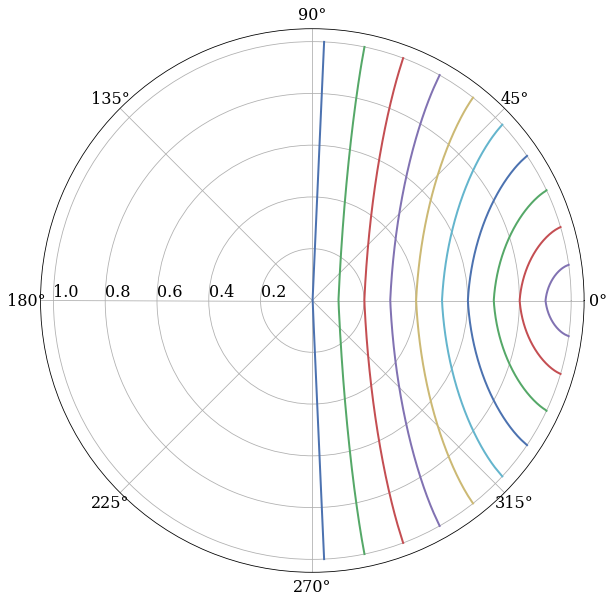

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(10,10))
ax.set_rlabel_position(180) 
for r0n in np.linspace(0.001, 0.9, 10):
    initial_r = 1.001*r0n  # start slightly above r0, otherwise circle does not reach the surface
    r_sol = odeint(tb_ode, initial_r, theta_grid) 
    last = np.count_nonzero(r_sol < Rn) + 1  # discard values after reaching the surface
    r_real = r_sol[0:last]
    theta_real = theta_grid[0:last]
    ax.plot(np.concatenate((-np.flip(theta_real), theta_real)), np.concatenate((np.flip(r_real), r_real)))  # symmetry 

The numerical results and the limit case of $R=\infty$ (classical brachistochrone) give rise to the assumption that the time-optimal path is given by a hypocycloid, the curve generated by a circle rolling inside another circle.

### Verification of the guess
![terrestrial_brachistochrone.svg](https://github.com/nagelt/soil_dynamics/raw/master/Images/terrestrial_brachistochrone.svg)

Let us check wether the hypocycloid of a circle of radius $a=\frac{R-r_0}{2}$ rolling inside the circle with radius $R$ satisfies the ODE for the optimal path.

In [10]:
a = (R-r0)/2

The dependency of $\theta$ on $\psi$ is given by the rolling condition $R\varphi=a\psi$ and the common height (opposite $\psi$ and $\theta-\varphi$) of the triangle with sides $r$, $a$ and the line connecting the centerpoints.

In [11]:
THETA = (a/R)*psi + sp.atan(a*sp.sin(psi)/(R-a-a*sp.cos(psi)))
d_theta_d_psi_tmp = sp.simplify( THETA.diff(psi) )
display(Math(r'\frac{\mathrm{d} \theta}{\mathrm{d} \psi}=' + sp.latex(d_theta_d_psi_tmp))) 
#print(sp.latex(d_theta_d_psi_tmp))

<IPython.core.display.Math object>

To formulate $\cos\psi$ and $\sin^2\psi$ as functions of radial position $r$ we use the Law of cosines

In [12]:
cospsi = (R**2 + 2*a**2 - 2*R*a - r**2)/(2*(R-a)*a)
sin2psi = 1-cospsi**2

In [13]:
d_theta_d_psi = sp.simplify( d_theta_d_psi_tmp.subs([ (sp.cos(psi), cospsi), (sp.sin(psi)**2, sin2psi)]) ) 
display(Math(r'\frac{\mathrm{d} \theta}{\mathrm{d} \psi}=' + sp.latex(d_theta_d_psi))) 
#print(sp.latex(d_theta_d_psi))

<IPython.core.display.Math object>

One feels tempted to differentiate the Law of cosines $r^2 = (R-a)^2 + a^2 - 2(R-a)a\cos\psi$
to resolve for $\psi(r)$, however then $\sin\psi$ pops up, while we have $\cos\psi$ readily available.
So we start from the Tangent half-angle formula $\tan\frac{\psi}{2}=\sqrt{\frac{1-\cos\psi}{1+\cos\psi}}$ where we eliminate $\cos\psi$ by the Law of cosines and then differentiate with respect to $r$.

In [14]:
PSI = 2*sp.atan(sp.sqrt((r**2 - r0**2)/(R**2 - r**2)))
d_psi_d_r = sp.simplify( PSI.diff(r) )
display(Math(r'\frac{\mathrm{d} \psi}{\mathrm{d} r}=' + sp.latex(d_psi_d_r)))
#print(sp.latex(d_psi_d_r))

<IPython.core.display.Math object>

It seems hard to find $r(\theta)$, however to find its derivative we make take advantage of the chain rule 
$\frac{\mathrm{d}r}{\mathrm{d}\theta} = \frac{\mathrm{d}r}{\mathrm{d}\psi} \frac{\mathrm{d}\psi}{\mathrm{d}\theta}$

In [15]:
d_r_d_theta = sp.simplify( (1/d_psi_d_r)*(1/d_theta_d_psi) )
display(Math(r'\frac{\mathrm{d} r}{\mathrm{d} \theta}=' + sp.latex(d_r_d_theta)))

<IPython.core.display.Math object>

That is exactly the optimaly condition (forward), so our guess turns out correct.